In [1]:
# Carrega Bibliotecas

library("scales")
library(dplyr)
library(ggplot2)
library(daltoolbox)
library(RColorBrewer)
library(GGally)
library(reshape)
library(corrplot)
library(WVPlots)
library(aplpack)
library(gridExtra)
library(tidyr)
library(factoextra)
library("dbscan")
library("fpc")
#color palette
colors <- brewer.pal(4, 'Set1')

# setting the font size for all charts
font <- theme(text = element_text(size=16))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


corrplot 0.92 loaded

Loading required package: wrapr


Attaching package: ‘wrapr’


The following object is masked from ‘package:dplyr’:

    coalesce


Warning message:
“no DISPLAY variable so Tk is not available”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘tidyr’


The following objects are masked from ‘package:wrapr’:

    pack, un

In [2]:
# Carrega Dataset
load("/home/data/malaria/malaria.RData")

# Lista Objetos
ls()

[1] "colors" "data"   "font"

In [3]:
# Exibe as Colunas
head(data)


,infection.county,home.county,notification.county,qty.parasites,scheme,notification.hr,home.hr,infection.hr,exam.type,exam.result,⋯,exam.month,exam.year,treatment.month,treatment.year,symptom.month,symptom.year,exam.interval,treatment.interval,notification.interval,previous.treatment
,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>
1,110001,110001,110001,501100,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,02,2014,02,2014,02,2014,on the same day,on the same day,on the same day,vivax
2,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,12,2014,12,2014,12,2014,on the same day,on the same day,1 to 7 days,vivax
3,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2014,11,2014,11,2014,on the same day,on the same day,on the same day,no
4,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2013,10,2013,10,2013,on the same day,on the same day,1 to 7 days,no
5,110001,110001,110001,3,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2014,10,2014,10,2014,on the same day,on the same day,1 to 7 days,no
6,110001,110001,110001,305500,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2013,11,2013,NA,NA,1 to 7 days,on the same day,NA,no


In [4]:
#Separa tabelas para usarmos no testarmos os algoritmos
split <- data %>% select (gender,age,exam.result)

#Aplicado filtro aos valores mais usados para o gráfico pois os demais campos eram muito irrelevantes para aparecer no gráfico
#também retira os resultados negativos

split <- split %>% filter (exam.result=="vivax" | exam.result=="falciparum")



In [5]:
summary(split)

     gender                        age             exam.result     
 male   :1604514   05 to 14 years old:621329   vivax     :2365980  
 female :1023725   15 to 24 years old:561862   falciparum: 262440  
 ignored:    175   25 to 34 years old:458624   negative  :      0  
 NA's   :      6   35 to 44 years old:320548   F+FG      :      0  
                   01 to 04 years old:268809   F+V       :      0  
                   (Other)           :397214   V+FG      :      0  
                   NA's              :    34   (Other)   :      0  

In [6]:
# Observamos que o algoritmos só aceita dados numéricos
# Transformando dados categóricos em dados numéricos

split$age <- unclass(split$age)
split$gender <- unclass(split$gender)
#tirando NA
split <- na.omit(split)


In [7]:
#agora só dados não numéricos
head(split)

,gender,age,exam.result
,<int>,<int>,<fct>
1,1,3,vivax
2,1,4,vivax
3,1,4,vivax
4,1,4,vivax
5,2,5,vivax
6,1,4,vivax


In [8]:
#reduzir a amostragem para 1000 registros

split <- sample_n(split, 1000)

In [9]:
# Aplicando o ALgoritmo Clustering do DBScan do DaltoolBox

# setup clustering
model <- cluster_dbscan(minPts = 10)
# build model
model <- fit(model, split[,1:2])
clu <- cluster(model, split[,1:2])
table(clu)




clu
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 
 34  52 147  43  75  99  72  80 133 108  48  53  25  18  13 

In [10]:
# evaluate model using external metric
eval <- evaluate(model, clu, split$exam.result)
eval

x,ce,qtd,ceg
<fct>,<dbl>,<int>,<dbl>
0,0.1914333,34,0.006508731
1,0.3912436,52,0.020344665
2,0.5553824,147,0.081641212
3,0.2713896,43,0.011669752
4,0.4021792,75,0.030163439
5,0.3685568,99,0.036487121
6,0.5813215,72,0.041855148
7,0.7691928,80,0.061535426
8,0.3571646,133,0.047502896


In [11]:
# Aplicando o ALgoritmo Clustering do k-means

modelk <- cluster_kmeans(k=3)

# build model
modelk <- fit(model, split[,1:2])
cluk <- cluster(model, split[,1:2])
table(cluk)
cluk

# evaluate model using external metric
evalk <- evaluate(modelk, cluk, split$exam.result)
evalk

cluk
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14 
 34  52 147  43  75  99  72  80 133 108  48  53  25  18  13 

[1]  1  2  3  4  5  2  6  7  2  3  2  8  8  9  1  3  2  8  5  8  6 10  5  1
  [25]  4  2  7  7  7  6  0  3  8  2  8  1  6  4 11  9  8  1  7  5  8  7  1  5
  [49]  4  2  2  5 10  9  6  5  2 12  7  4  5  2  4  1  3  8  3  8  8  3  1  1
  [73]  8  8  9  1  6  3  7  1  4  8  8  8  4  2  6  9  5  2  2  9  7  9 11  9
  [97] 10  2  2  7  2 11  5  4 12  5  5  3  9  4  6  9  2  2  8  1  5  2  4  8
 [121] 10 13  6 11  1  1  5 11  1  8  8 11  9  0  8  8  4  6  1 10  2  7  2  5
 [145]  4 14  9  9  9 10  8  2  5  8  1  5  6 12  5  2  9  8  7  8 13 11  7 10
 [169]  2  8  2  8  9  0 10  2  6  6  9  1 14 12  7  6  8 11  9  5 11  1  0  7
 [193]  4  9  9  5  8 13  6  7  8 12  8  8  7  5  5  9  3 11  7  8  2  4  9 14
 [217]  7  5  5  9  7  2  8  4  9  2  9  0 10  2  8  2  7  9  4  6  2  1  0  3
 [241]  2  2 13  0  5 14  8  8  5  6  2  8  9  7  6  5 10 10  9 11 14  2  5  3
 [265]  8  9  7  2  4  8  2  6  1  6  8 12 11 12  7  9  9  2  1 12  8  7  4  8
 [289]  8  2  5  9  9  2  9  9  4  2  4  7  8  2  9  1 11 11  8  8  9 12  0  9
 [313]  5  5  8 10  2  9  4  2  4  2  9  2  2  2  9  7  5 13  0  2  6  1  0  5
 [337]  8 11  5  8  2  3  4  2  2 10  8  8  5  8  6  6  0 10  9 10  0 13  8  2
 [361]  3  5  7  5  3 13  2  8  7  9  6  8  5  7  2  7  2 12  2  4  5  4 10  9
 [385]  1  5  1  2  4  4  3 12  8  9 11  4  5  5  7  3 12  2  0  5  2 13  6  9
 [409] 10  5  4  2  6  8  5  4  7 11 10  0  9  3  5  1  8  3  4  6 11  7 10  9
 [433]  1  5  9 10  2  8  4  8  2  4  8  2  8  1  2  1 13  9  9  4  7  7  2 13
 [457]  5 12  9  2  4  2  8 11  0  4 10  4  4  2  8  2  2  3 12  1  9  6  9  6
 [481]  4  5  2  8  9  2 11  0  5 11  1  9  7  5  4  6 11  6  5 11  1  6  8  8
 [505]  2  2  9  7 12  2  3  7 11 10  9  2  8 10  2  2  9  6  7  2  2  5  2 11
 [529]  2  2  7  5 11  2  7 10  2 10  7  2  7  8  4  9  3  1  9  6  3  8  8 12
 [553]  2  4 10  5  6  9  2  2  8  5  7  8 10  7 11  9  5  9  1  4  8  2 13  4
 [577]  1  8  7  2 10  5 11  6  7 12  8  8  5  6  7  6  8  6 11 14  5  9  4  2
 [601]  2  7  4  2  8  5  5  8  9  2  7  2  9 11  2  4  4  0  8  3 11  3  7 10
 [625]  8  2  7  9 14  0  4  5  5  5  2 11  4  6  3  2  2  7  8  9  8  5  8  5
 [649]  4  1  6  3  6  5  8  3  3  9  4  8 11  8  0  6  5  4 10  2  9  4  2  2
 [673]  2 12  5  3  5  8  2  2 11  9  3  2 10  6 12  8 10  8  9  2  2  8  9  2
 [697]  3  2  4  6  2 10 10  9  8  6  8  5  0  8 11  6  6  8  7  9  7 10  6  0
 [721]  4  7  8  1  5  3  2  4  8  2  7  7  6  5  3  0  9 13  5  8  6 12  6  1
 [745]  9  5  5  0  3 14  7  5 11  8  2  6  2  4  4  2  8  4  1 12  4  7  9 10
 [769]  7  8  8  8  5 14  8  9  7 13  5  7  4  8 13  8  1  8  3  5  2  8  9  0
 [793]  0  1  3 13  9  0  5 10  6  8  2  5 10 11 10  5  7  9  5  8  1  8  2 11
 [817]  9 14 10  5  3 11  7  9  9 11  1  6  2  9  5  5  2  7  6  5  6  5  7 13
 [841]  8  8  0  4  6  5  4  4  2 12  2 10 14  2  8  6  2  6 12  9  9 11  9  8
 [865]  6  4  4  3  8  9  7 11  2 10  7  9  1  2  0  4  8 11  0  9  8 11  2  9
 [889]  7  8  1  1 11  2  9  0  9  6  3 10  9 12  6  9  2 14  6 11  9  2  1  3
 [913]  5  9  3  6  4 11  8  7  1  5  6  1  4  2  1  7  2  8 11  4  8  4  4 10
 [937]  8 12  5 10  5  9  2  2  9 10  0  5 11  6  1  4  2 11  2  6  7  2  2  2
 [961]  0  6 13  8  3  6  9  8  9  5  8 14  0  7 11  8  9 11  7  7 10  8  8  6
 [985]  0  6  2  9  5  7  7 11  7 13  2  9  9  8  5 10
attr(,"metric")
[1] 34

x,ce,qtd,ceg
<fct>,<dbl>,<int>,<dbl>
0,0.1914333,34,0.006508731
1,0.3912436,52,0.020344665
2,0.5553824,147,0.081641212
3,0.2713896,43,0.011669752
4,0.4021792,75,0.030163439
5,0.3685568,99,0.036487121
6,0.5813215,72,0.041855148
7,0.7691928,80,0.061535426
8,0.3571646,133,0.047502896


In [12]:
# Aplicando o ALgoritmo de tunning de hyperparametro no k-means

# fit model
modelt <- clu_tune(cluster_kmeans(k = 0))
ranges <- list(k = 1:10)
modelt <- fit(modelt, split[,1:2], ranges)
print ("Parâmetro escolhido: ", modelt$k)

# run model
clut <- cluster(modelt, split[,1:2])
table(clut)
# evaluate model using external metric
evalt <- evaluate(modelt, clut, split$exam.result)
evalt

[1] "Parâmetro escolhido: "


clut
   1 
1000 

x,ce,qtd,ceg
<fct>,<dbl>,<int>,<dbl>
1,0.4846477,1000,0.4846477


In [13]:
# Aplicando o ALgoritmo Clustering de PAM

# setup clustering
modelp <- cluster_pam(k=3)
# build model
modelp <- fit(modelp, split[,1:2])
clup <- cluster(modelp, split[,1:2])
table(clup)
clup

# evaluate model using external metric
evalp <- evaluate(modelp, clup, split$exam.result)
evalp


clup
  1   2   3 
350 393 257 

[1] 1 2 1 2 2 2 2 3 2 1 2 1 1 1 1 1 2 1 2 1 2 3 2 1 2 2 3 3 3 2 1 1 1 2 1 1 2
  [38] 2 3 1 1 1 3 2 1 3 1 2 2 2 2 2 3 1 2 2 2 3 3 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 2 1 3 1 2 1 1 1 2 2 2 1 2 2 2 1 3 1 3 1 3 2 2 3 2 3 2 2 3 2 2 1 1 2 2
 [112] 1 2 2 1 1 2 2 2 1 3 3 2 3 1 1 2 3 1 1 1 3 1 1 1 1 2 2 1 3 2 3 2 2 2 3 1 1
 [149] 1 3 1 2 2 1 1 2 2 3 2 2 1 1 3 1 3 3 3 3 2 1 2 1 1 3 3 2 2 2 1 1 3 3 3 2 1
 [186] 3 1 2 3 1 3 3 2 1 1 2 1 3 2 3 1 3 1 1 3 2 2 1 1 3 3 1 2 2 1 3 3 2 2 1 3 2
 [223] 1 2 1 2 1 1 3 2 1 2 3 1 2 2 2 1 1 1 2 2 3 3 2 3 1 1 2 2 2 1 1 3 2 2 3 3 1
 [260] 3 3 2 2 1 1 1 3 2 2 1 2 2 1 2 1 3 3 3 3 1 1 2 1 3 1 3 2 1 1 2 2 1 1 2 1 1
 [297] 2 2 2 3 1 2 1 1 3 3 1 1 1 3 3 1 2 2 1 3 2 1 2 2 2 2 1 2 2 2 1 3 2 3 3 2 2
 [334] 1 1 2 1 3 2 1 2 1 2 2 2 3 1 1 2 1 2 2 3 3 1 3 3 3 1 2 1 2 3 2 1 3 2 1 3 1
 [371] 2 1 2 3 2 3 2 3 2 2 2 2 3 1 1 2 1 2 2 2 1 3 1 1 3 2 2 2 3 1 3 2 3 2 2 3 2
 [408] 1 3 2 2 2 2 1 2 2 3 3 3 3 1 1 2 1 1 1 2 2 3 3 3 1 1 2 1 3 2 1 2 1 2 2 1 2
 [445] 1 1 2 1 3 1 1 2 3 3 2 3 2 3 1 2 2 2 1 3 3 2 3 2 2 2 1 2 2 1 3 1 1 2 1 2 2
 [482] 2 2 1 1 2 3 3 2 3 1 1 3 2 2 2 3 2 2 3 1 2 1 1 2 2 1 3 3 2 1 3 3 3 1 2 1 3
 [519] 2 2 1 2 3 2 2 2 2 3 2 2 3 2 3 2 3 3 2 3 3 2 3 1 2 1 1 1 1 2 1 1 1 3 2 2 3
 [556] 2 2 1 2 2 1 2 3 1 3 3 3 1 2 1 1 2 1 2 3 2 1 1 3 2 3 2 3 2 3 3 1 1 2 2 3 2
 [593] 1 2 3 3 2 1 2 2 2 3 2 2 1 2 2 1 1 2 3 2 1 3 2 2 2 1 1 1 3 1 3 3 1 2 3 1 3
 [630] 1 2 2 2 2 2 3 2 2 1 2 2 3 1 1 1 2 1 2 2 1 2 1 2 2 1 1 1 1 2 1 3 1 1 2 2 2
 [667] 3 2 1 2 2 2 2 3 2 1 2 1 2 2 3 1 1 2 3 2 3 1 3 1 1 2 2 1 1 2 1 2 2 2 2 3 3
 [704] 1 1 2 1 2 1 1 3 2 2 1 3 1 3 3 2 3 2 3 1 1 2 1 2 2 1 2 3 3 2 2 1 1 1 3 2 1
 [741] 2 3 2 1 1 2 2 1 1 3 3 2 3 1 2 2 2 2 2 2 1 2 1 3 2 3 1 3 3 1 1 1 2 3 1 1 3
 [778] 3 2 3 2 1 3 1 1 1 1 2 2 1 1 3 3 1 1 3 1 1 2 3 2 1 2 2 3 3 3 2 3 1 2 1 1 1
 [815] 2 3 1 3 3 2 1 3 3 1 1 3 1 2 2 1 2 2 2 3 2 2 2 2 3 3 1 1 1 2 2 2 2 2 2 3 2
 [852] 3 3 2 1 2 2 2 3 1 1 3 1 1 2 2 2 1 1 1 3 3 2 3 3 1 1 2 3 2 1 3 3 1 1 3 2 1
 [889] 3 1 1 1 3 2 1 3 1 2 1 3 1 3 2 1 2 3 2 3 1 2 1 1 2 1 1 2 2 3 1 3 1 2 2 1 2
 [926] 2 1 3 2 1 3 2 1 2 2 3 1 3 2 3 2 1 2 2 1 3 1 2 3 2 1 2 2 3 2 2 3 2 2 2 3 2
 [963] 3 1 1 2 1 1 1 2 1 3 3 3 3 1 1 3 3 3 3 1 1 2 3 2 2 1 2 3 3 3 3 3 2 1 1 1 2
[1000] 3
attr(,"metric")
[1] 13853

x,ce,qtd,ceg
<fct>,<dbl>,<int>,<dbl>
1,0.3274449,350,0.1146057
2,0.4904028,393,0.1927283
3,0.6424386,257,0.1651067


In [14]:
#Tabela Comparativa dos Resultados de Cada Algoritmo

# recebe os resultados de cada algoritmo e no final agrupa os resultados em um DataFrame
result1 <- data.frame(X=c("DBScan"),Cluster_Entropy=eval$clustering_entropy,Data_Entropy=eval$data_entropy)
result2 <- data.frame(X=c("K-Means"),Cluster_Entropy=evalk$clustering_entropy,Data_Entropy=evalk$data_entropy)
result3 <- data.frame(X=c("Tunned K-Means"),Cluster_Entropy=evalt$clustering_entropy,Data_Entropy=evalt$data_entropy)
result4 <- data.frame(X=c("PAM"),Cluster_Entropy=evalp$clustering_entropy,Data_Entropy=evalp$data_entropy)
total <- bind_rows(result1, result2, result3, result4)

head(total)

,X,Cluster_Entropy,Data_Entropy
,<chr>,<dbl>,<dbl>
1,DBScan,0.4623440,0.4846477
2,K-Means,0.4623440,0.4846477
3,Tunned K-Means,0.4846477,0.4846477
4,PAM,0.4724408,0.4846477


In [16]:
# tratando dados para Plot
data2 <- na.omit(data)
data2 <- sample_n(data2, 1000)
data3 <- data2 %>% select(3:8)
data4 <- data2 %>% select(9:15)

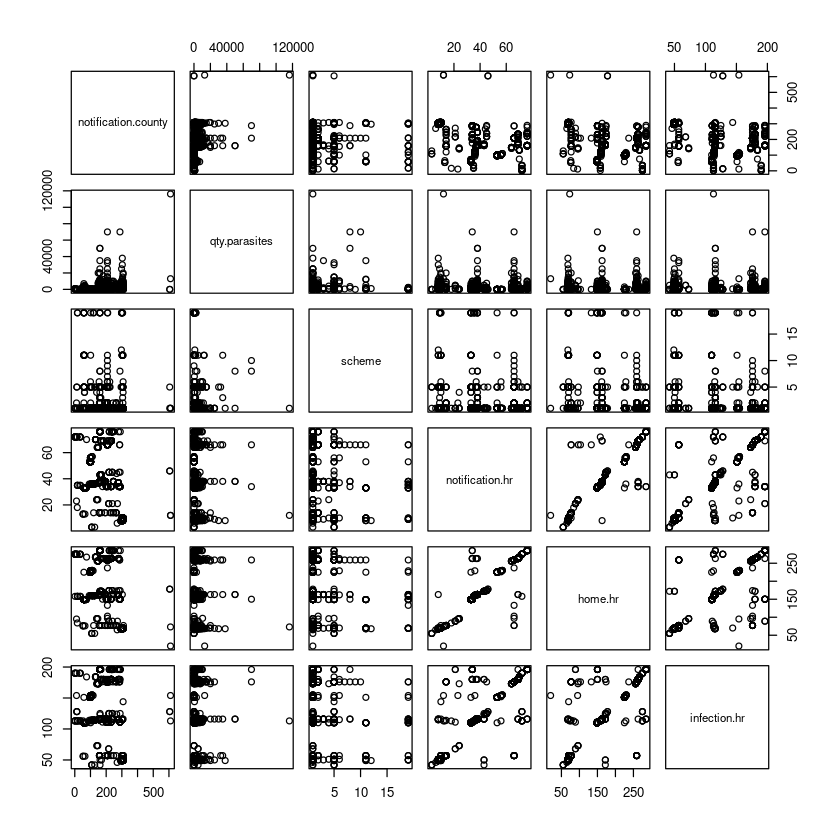

In [17]:
# Dando uma olhada na disperção dos dados para novos candidatos
pairs(data3)


Warning message:
“argument frame is deprecated; please use ellipse instead.”


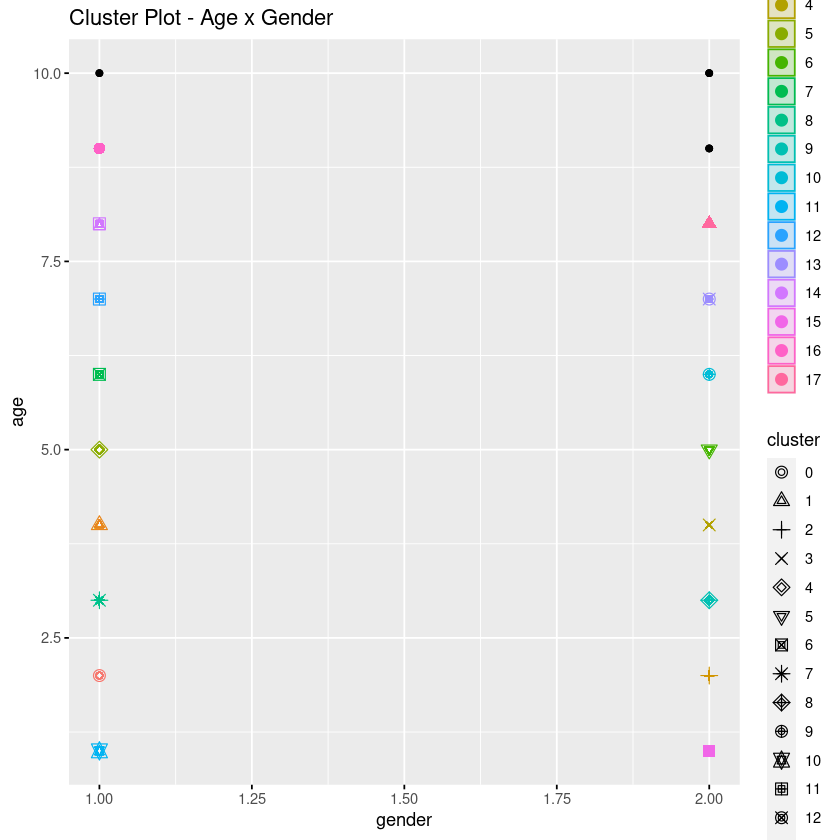

In [18]:
# Compute DBSCAN using fpc package
set.seed(123)
db <- fpc::dbscan(split[,1:2], eps = 0.15, MinPts = 5)
# Plot DBSCAN results
#plot(db, split[,1:2], main = "DBSCAN", frame = FALSE)
fviz_cluster(db, split[,1:2], stand = FALSE, frame = FALSE, geom = "point",
            main = "Cluster Plot - Age x Gender")

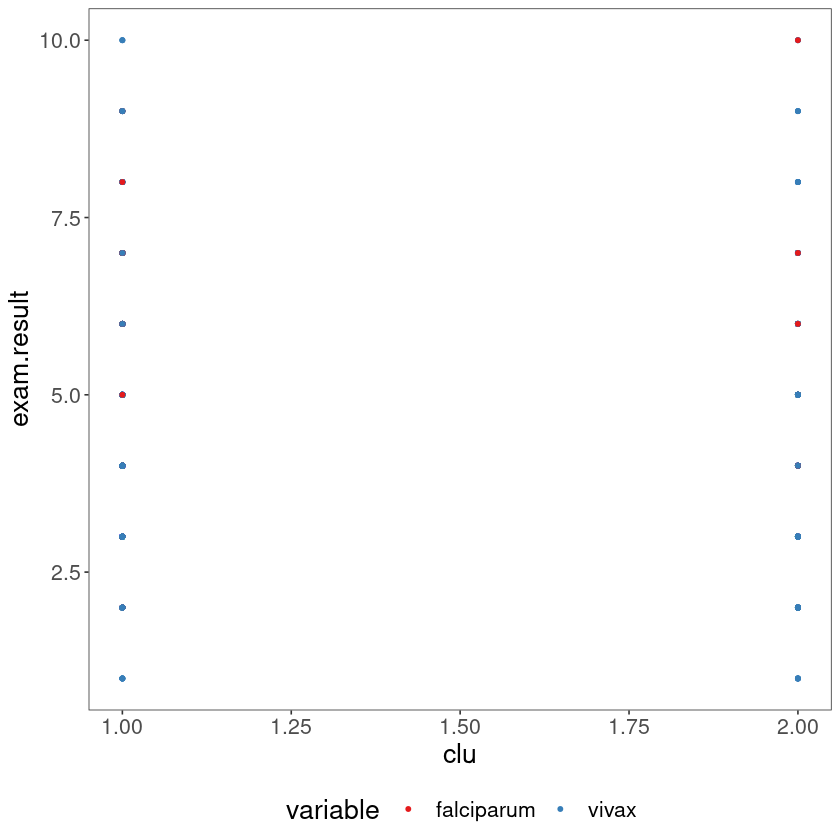

In [19]:
grf <- plot_scatter(split |> select(x = gender, value = age, variable = exam.result), 
                    label_x = "clu", label_y = "exam.result", colors=colors[1:3]) + font
plot(grf)

Warning message:
“argument frame is deprecated; please use ellipse instead.”


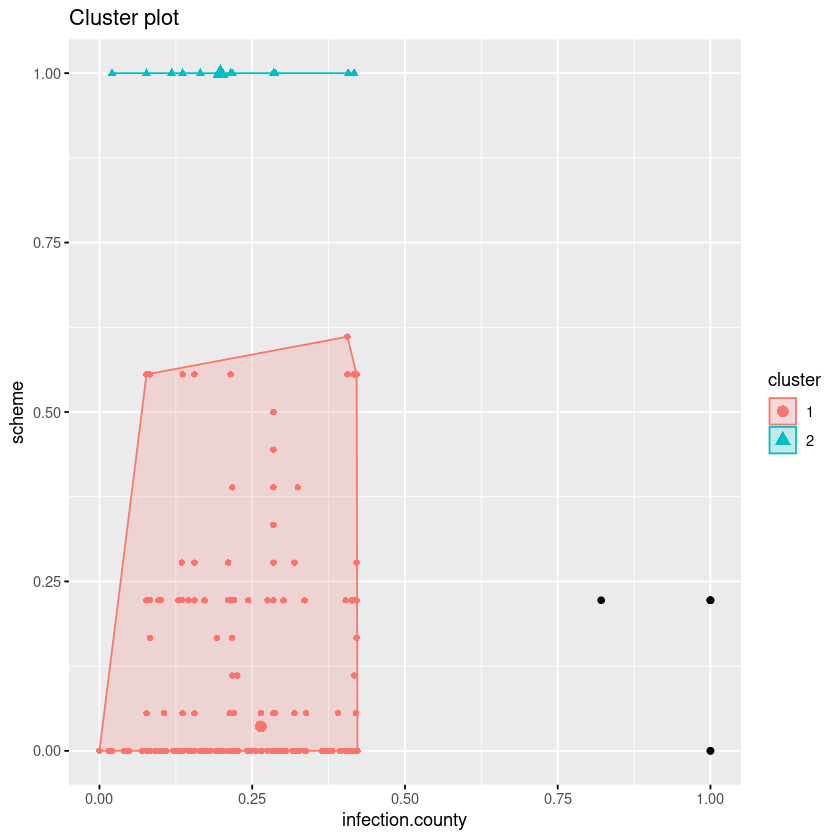

In [20]:
#Plotando Alguns Gráficos com o fviz_cluster

#plot_scatter(split, label_x = split$gender, label_y = split$age)
#plot(data2$notification.county,split$qty.parasites)
#head(split)
# Compute DBSCAN using fpc package
set.seed(123)
teste <- data2 %>% select (infection.county,scheme)
teste$infection.county <- unclass(teste$infection.county)
teste$scheme <- unclass(teste$scheme)
teste$infection.county <- rescale(teste$infection.county)
teste$scheme <- rescale(teste$scheme)
db2 <- fpc::dbscan(teste, eps = 0.15, MinPts = 5)
# Plot DBSCAN results
#plot(db2, teste[,1], main = "DBSCAN Infection Count", frame = FALSE)
fviz_cluster(db2, teste, stand = FALSE, frame = FALSE, geom = "point")

Warning message:
“argument frame is deprecated; please use ellipse instead.”


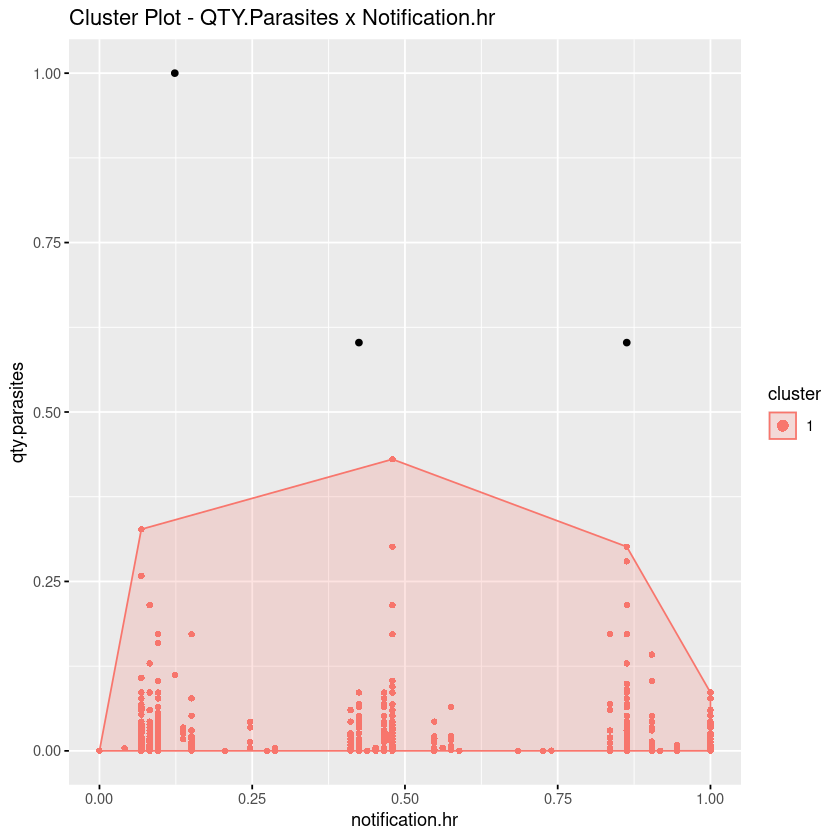

In [21]:
teste2 <- data2 %>% select (notification.hr,qty.parasites)
teste2$notification.hr <- unclass(teste2$notification.hr)
teste2$qty.parasites <- unclass(teste2$qty.parasites)
teste2$notification.hr <- rescale(teste2$notification.hr)
teste2$qty.parasites <- rescale(teste2$qty.parasites)

teste2$qty.parasites <- as.numeric(teste2$qty.parasites)
teste2$notification.hr <- as.numeric(teste2$notification.hr)

db4 <- fpc::dbscan(teste2, eps = 0.15, MinPts = 5)
fviz_cluster(db4, teste2, stand = FALSE, frame = FALSE, geom = "point", main = "Cluster Plot - QTY.Parasites x Notification.hr")

In [ ]:
args(fviz_cluster)

In [1]:
# ------------------ #

In [ ]:
k_means_test <- function(data, classe, paramsList) {
  model <- clu_tune(cluster_kmeans(k = 0))
  model <- fit(model, data, paramsList)
  clu <- cluster(model, data)
  eval <- evaluate(model, clu, classe)
  eval
}

my_dict <- list(
  best_algorithm = 'best',
  params = c("item1", "item2"),
  result = 10
)

#------------ geográfica ----------- #
split_infection_region_parasite <- data %>% select (infection.county,infection.hr,
                                           infection.state,infection.country,
                                           exam.result, hemiparasite)
s_i_r_p <- split_infection_region_parasite %>% 
  filter (exam.result!="negative" & hemiparasite!="negative")
s_i_r_p$infection.county <- unclass(s_i_r_p$infection.county)
s_i_r_p$infection.hr <- unclass(s_i_r_p$infection.hr)
s_i_r_p$infection.state <- unclass(s_i_r_p$infection.state)
s_i_r_p$infection.country <- unclass(s_i_r_p$infection.country)
s_i_r_p <- na.omit(s_i_r_p) #na.omit

#------------ geográfica ----------- #
# -- Parasitas -- #
split_infection_region_parasite <- data %>% select (infection.county,infection.hr,
                                                    infection.state,infection.country,
                                                    exam.result, hemiparasite)
s_i_r_p <- na.omit(split_infection_region_parasite)
s_i_r_p <- s_i_r_p %>% filter (exam.result!="negative")
#s_i_r_p <- s_i_r_p %>% filter (hemiparasite!="negative")
s_i_r_p$infection.county <- unclass(s_i_r_p$infection.county)
s_i_r_p$infection.hr <- unclass(s_i_r_p$infection.hr)
s_i_r_p$infection.state <- unclass(s_i_r_p$infection.state)
s_i_r_p$infection.country <- unclass(s_i_r_p$infection.country)

#Escolha de parametros
params <- list( k = c(180,190,200,210) )
as.integer(params[['k']] )

# Teste full
result <- k_means_test(s_i_r_p[,1:4], s_i_r_p$hemiparasite, params)

# Clustering por quantidade de parasitas
split_infection_region_parasite <- data %>% select (infection.county,infection.hr,
                                                    infection.state,infection.country,
                                                    qty.parasites)
s_i_r_p <- na.omit(split_infection_region_parasite)
# -- Smoothing na quantidade de parasitas
ob <- smoothing_cluster(n = 10)
ob <- fit(ob, s_i_r_p$qty.parasites)
qnt_parasites_bins <- transform(ob, s_i_r_p$qty.parasites)
s_i_r_p$qty.parasites <- qnt_parasites_bins
s_i_r_p$infection.county <- unclass(s_i_r_p$infection.county)
s_i_r_p$infection.hr <- unclass(s_i_r_p$infection.hr)
s_i_r_p$infection.state <- unclass(s_i_r_p$infection.state)
s_i_r_p$infection.country <- unclass(s_i_r_p$infection.country)
#Escolha de parametros
params <- list( k = c(180,190,200,210) )
as.integer(params[['k']] )
result <- k_means_test(s_i_r_p[,1:4], s_i_r_p$qty.parasites, params)

# Clustering demográfico
split_demografico <- data %>% select (age, gender, race, 
                                      #occupation, education.level,
                                pregnancy, autochthonous.case, 
                                #exam.result)
                                #hemiparasite)
                                #previous.treatment)
                                symptom)

split_demog <- na.omit(split_demografico)

#split_demog$occupation <- unclass(split_demog$occupation)
#split_demog$education.level <- unclass(split_demog$education.level)
# -------- Organizando as grávidas ------------- #
split_demog <- split_demog %>% filter (pregnancy != "ignored gestational ")
split_demog <- split_demog %>%
  mutate(pregnancy = ifelse(grepl("trimester", pregnancy) , as.integer(1), as.integer(0)))

split_demog$pregnancy <- unclass(split_demog$pregnancy)
split_demog$autochthonous.case <- unclass(split_demog$autochthonous.case)
split_demog$age <- unclass(split_demog$age)
split_demog$gender <- unclass(split_demog$gender)
split_demog$race <- unclass(split_demog$race)

#Tornando os resultados de exames positivos ou negativos
#split_demog <- split_demog %>%
#  mutate(exam.result = ifelse(exam.result != 'negative', 'positive', 'negative'))

#Separando os parasitas
#split_demog <- split_demog %>% filter (hemiparasite != "negative")

#Escolha de parametros
params <- list( k = c(10,50,100,200) )
as.integer(params[['k']] )
#result <- k_means_test(split_demog[,1:5], split_demog$exam.result, params)
#result <- k_means_test(split_demog[,1:5], split_demog$hemiparasite, params)
#result <- k_means_test(split_demog[,1:5], split_demog$previous.treatment, params)
result <- k_means_test(split_demog[,1:5], split_demog$symptom, params)

# Clustering temporal
split_temporal <- data %>% select (notification.month, notification.year,
                                   exam.month, exam.year, treatment.month,
                                   symptom.month, symptom.year,
                                   exam.interval, treatment.interval,
                                   notification.interval,
                                   #symptom)
                                   exam.result)
                                   #hemiparasite)
split_tempo <- na.omit(split_temporal)

split_tempo$notification.month <- unclass(split_tempo$notification.month)
split_tempo$notification.year <- unclass(split_tempo$notification.year)
split_tempo$exam.month <- unclass(split_tempo$exam.month)
split_tempo$exam.year <- unclass(split_tempo$exam.year)
split_tempo$treatment.month <- unclass(split_tempo$treatment.month)
split_tempo$symptom.month <- unclass(split_tempo$symptom.month)
split_tempo$symptom.year <- unclass(split_tempo$symptom.year)
split_tempo$exam.interval <- unclass(split_tempo$exam.interval)
split_tempo$treatment.interval <- unclass(split_tempo$treatment.interval)
split_tempo$notification.interval <- unclass(split_tempo$notification.interval)

#split_tempo$symptom <- unclass(split_tempo$symptom)
#split_tempo <- split_tempo %>%
#  mutate(exam.result = ifelse(exam.result != 'negative', 'positive', 'negative'))
split_tempo$exam.result <- unclass(split_tempo$exam.result)

#split_tempo$hemiparasite <- unclass(split_tempo$hemiparasite)

params <- list( k = c(12,100,500, 1000) )
as.integer(params[['k']] )
#result <- k_means_test(split_tempo[,1:11], split_tempo$symptom, params)
#result <- k_means_test(split_tempo[,1:11], split_tempo$exam.result, params)
#result <- k_means_test(split_tempo[,1:11], split_tempo$hemiparasite, params)

# Clustering da doença
split_sick <- data %>% select (symptom, qty.parasites, exam.type,
                                   hemiparasite, detection.type,
                                   #symptom),
                                   exam.result)
split_sick <- na.omit(split_sick)
ob <- smoothing_cluster(n = 10)
ob <- fit(ob, split_sick$qty.parasites)
split_sick$qty.parasites <- transform(ob, split_sick$qty.parasites)
split_sick$qty.parasites <- as.integer(round(split_sick$qty.parasites))
split_sick$qty.parasites <- unclass(split_sick$qty.parasites)
split_sick$symptom <- unclass(split_sick$symptom)
split_sick$exam.type <- unclass(split_sick$exam.type)
split_sick$hemiparasite <- unclass(split_sick$hemiparasite)
split_sick$detection.type <- unclass(split_sick$detection.type)
split_sick$exam.result <- unclass(split_sick$exam.result)
split_sick <- na.omit(split_sick)
params <- list( k = c(200,400,800,1600) )
as.integer(params[['k']] )
result <- k_means_test(split_sick[,1:5], split_sick$exam.result, params)

# --- caso precise usar samples --- #
sample <- sample_stratified("exam.result")
folds <- k_fold(sample, split_infection_region, 2)
my_sample <- folds[[1]]
result <- k_means_test(my_sample[,1:4], my_sample[,5], params)